## OneMax problem with 1000 bits

In [1]:
from thefittest.optimizers import GeneticAlgorithm
from thefittest.benchmarks import OneMax

number_of_iterations = 100
population_size = 200
string_length = 1000

optimizer = GeneticAlgorithm(fitness_function=OneMax(),
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=string_length,
                         show_progress_each=10)

optimizer.fit()

fittest = optimizer.get_fittest()

0-th iteration with the best fitness = 538.0
10-th iteration with the best fitness = 674.0
20-th iteration with the best fitness = 783.0
30-th iteration with the best fitness = 863.0
40-th iteration with the best fitness = 915.0
50-th iteration with the best fitness = 945.0
60-th iteration with the best fitness = 954.0
70-th iteration with the best fitness = 966.0
80-th iteration with the best fitness = 975.0
90-th iteration with the best fitness = 986.0


## Rastrign problem with 10 variables

In [2]:
import numpy as np
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rastrigin


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=Rastrigin(),
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=30,
                         minimization=True,
                         selection="tournament_k",
                         crossover="two_point",
                         mutation="weak",
                         tour_size=6,
                         optimal_value=0.)

optimizer.fit()

fittest = optimizer.get_fittest()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

0-th iteration with the best fitness = 77.78370578581975
30-th iteration with the best fitness = 2.129137503047536
60-th iteration with the best fitness = 1.992609777778128
90-th iteration with the best fitness = 1.989925792602163
120-th iteration with the best fitness = 1.9899182741925117
150-th iteration with the best fitness = 1.9899181200940124
180-th iteration with the best fitness = 1.9899181142413767
210-th iteration with the best fitness = 1.9899181141866542
240-th iteration with the best fitness = 1.9899181141865832
270-th iteration with the best fitness = 1.9899181141865832
The fittest individ: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

## Custom problem

0-th iteration with the best fitness = 2.3087873800789556
10-th iteration with the best fitness = 1.6906247116742783e-05
20-th iteration with the best fitness = 6.950933149599434e-08
The fittest individ: [1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1]
The fittest individ: [ 4.99999931 11.9999903 ]
with fitness -9.447413690114384e-11


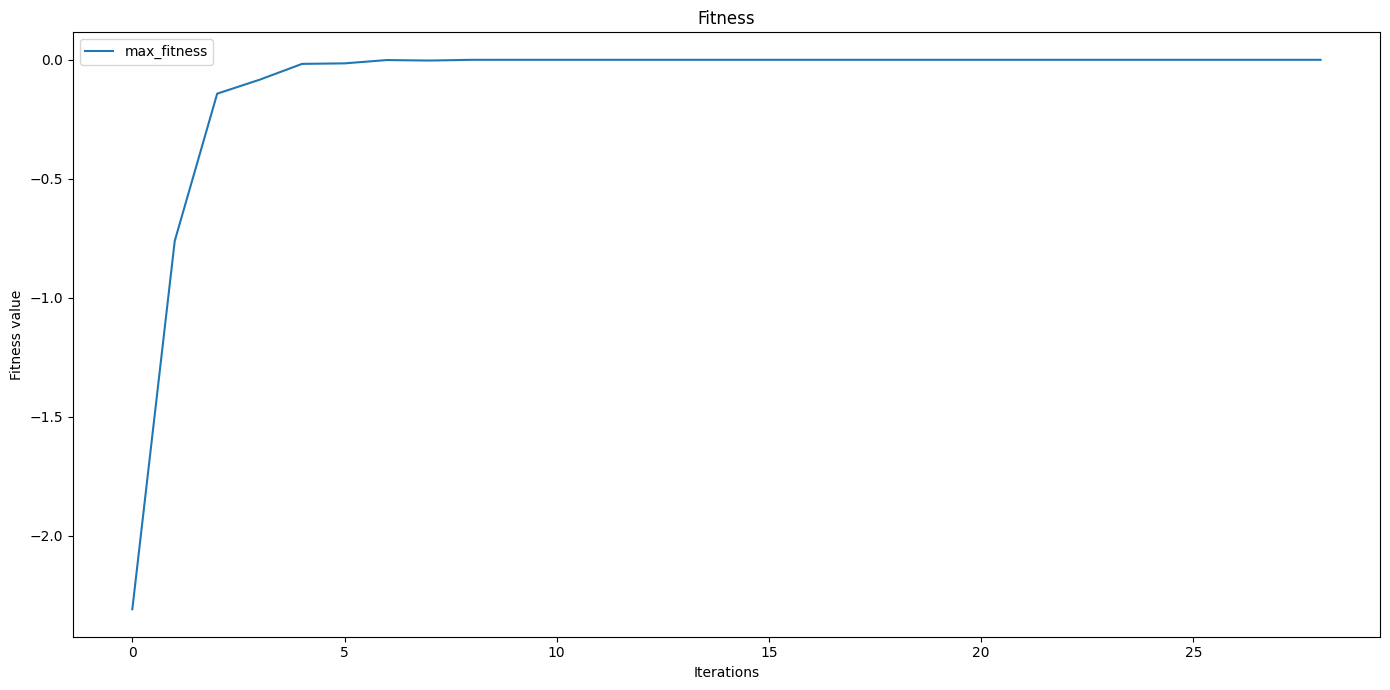

In [3]:
import matplotlib.pyplot as plt


def custom_problem(x):
    return (5 - x[:, 0])**2 + (12 - x[:, 1])**2


n_dimension = 2
left_border = -100.
right_border = 100.
n_bits_per_variable = 32

number_of_iterations = 100
population_size = 100

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)


genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=custom_problem,
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=10,
                         minimization=True,
                         optimal_value=0,
                         termination_error_value=1e-10,
                         keep_history=True,
                         elitism=False)


optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])


iters_done = len(stats['max_fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=1)
ax.plot(range(iters_done), stats['max_fitness'], label = "max_fitness")
ax.set_title('Fitness')
ax.set_ylabel('Fitness value')
ax.set_xlabel("Iterations")
ax.legend()

plt.tight_layout()
plt.show()

## SelfCGA

0-th iteration with the best fitness = 22.11112846379429
30-th iteration with the best fitness = 0.014512394553036434
60-th iteration with the best fitness = 7.31008111426971e-05
90-th iteration with the best fitness = 2.5521897319294925e-07
120-th iteration with the best fitness = 1.0264988606219157e-08
150-th iteration with the best fitness = 9.381983313539281e-11
180-th iteration with the best fitness = 7.888310772814766e-12
210-th iteration with the best fitness = 8.088419257284984e-14
240-th iteration with the best fitness = 2.6915318931952648e-15
270-th iteration with the best fitness = 8.809142651444724e-16
The fittest individ: [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

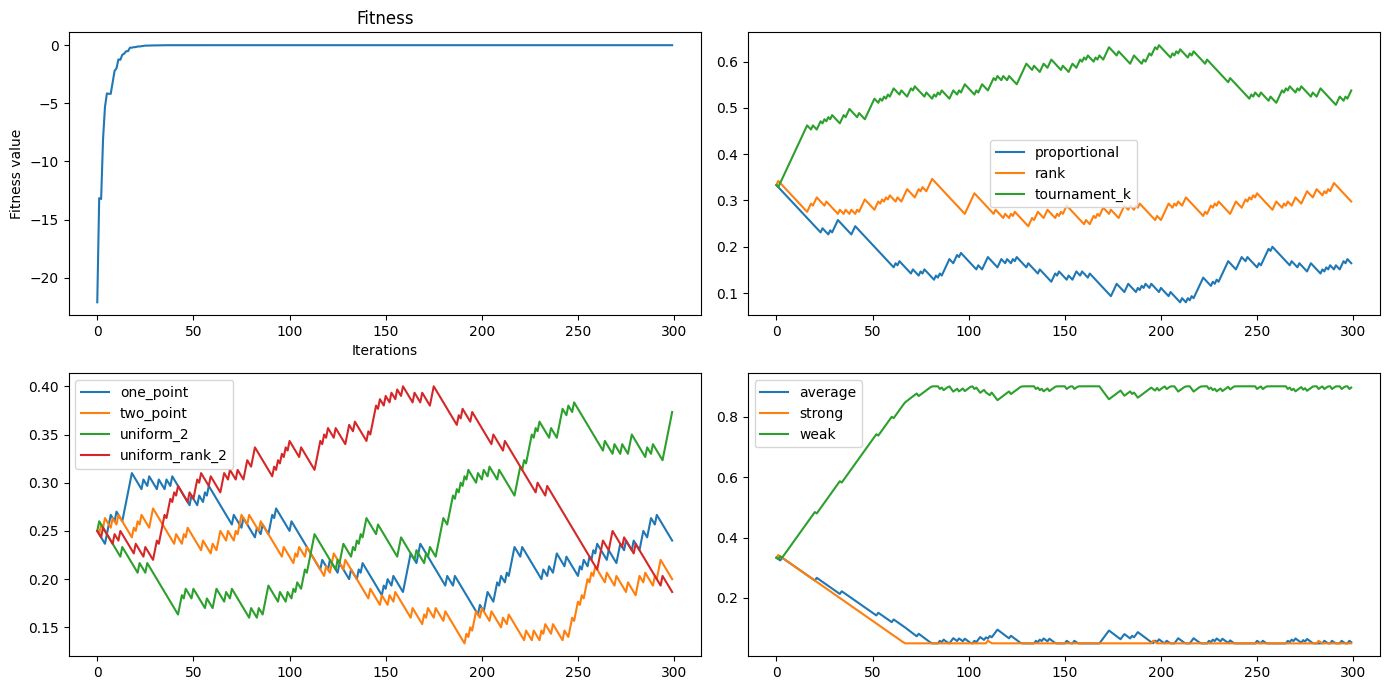

In [4]:
from collections import defaultdict
from thefittest.optimizers import SelfCGA
from thefittest.benchmarks import Sphere


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = SelfCGA(fitness_function=Sphere(),
                    genotype_to_phenotype=genotype_to_phenotype.transform,
                    iters=number_of_iterations,
                    pop_size=population_size,
                    str_len=sum(parts),
                    show_progress_each=30,
                    minimization=True,
                    selections=("tournament_k", "rank", "proportional"),
                    crossovers=("two_point", "one_point", "uniform_2", "uniform_rank_2"),
                    mutations=("weak", "average", "strong"),
                    tour_size=5,
                    K=4,
                    keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)

ax[0][0].plot(range(number_of_iterations), stats['max_fitness'])
ax[0][0].set_title('Fitness')
ax[0][0].set_ylabel('Fitness value')
ax[0][0].set_xlabel("Iterations")

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()


## SHAGA

0-th iteration with the best fitness = 7986.878309363336
30-th iteration with the best fitness = 52.381942341487864
60-th iteration with the best fitness = 4.169897598974931
90-th iteration with the best fitness = 1.1586634970234182
120-th iteration with the best fitness = 0.42784331016836297
150-th iteration with the best fitness = 0.27513631248541737
180-th iteration with the best fitness = 0.1904588194110272
210-th iteration with the best fitness = 0.15270439192497315
240-th iteration with the best fitness = 0.13986690504282548
270-th iteration with the best fitness = 0.1333360057795889
The fittest individ: [1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 

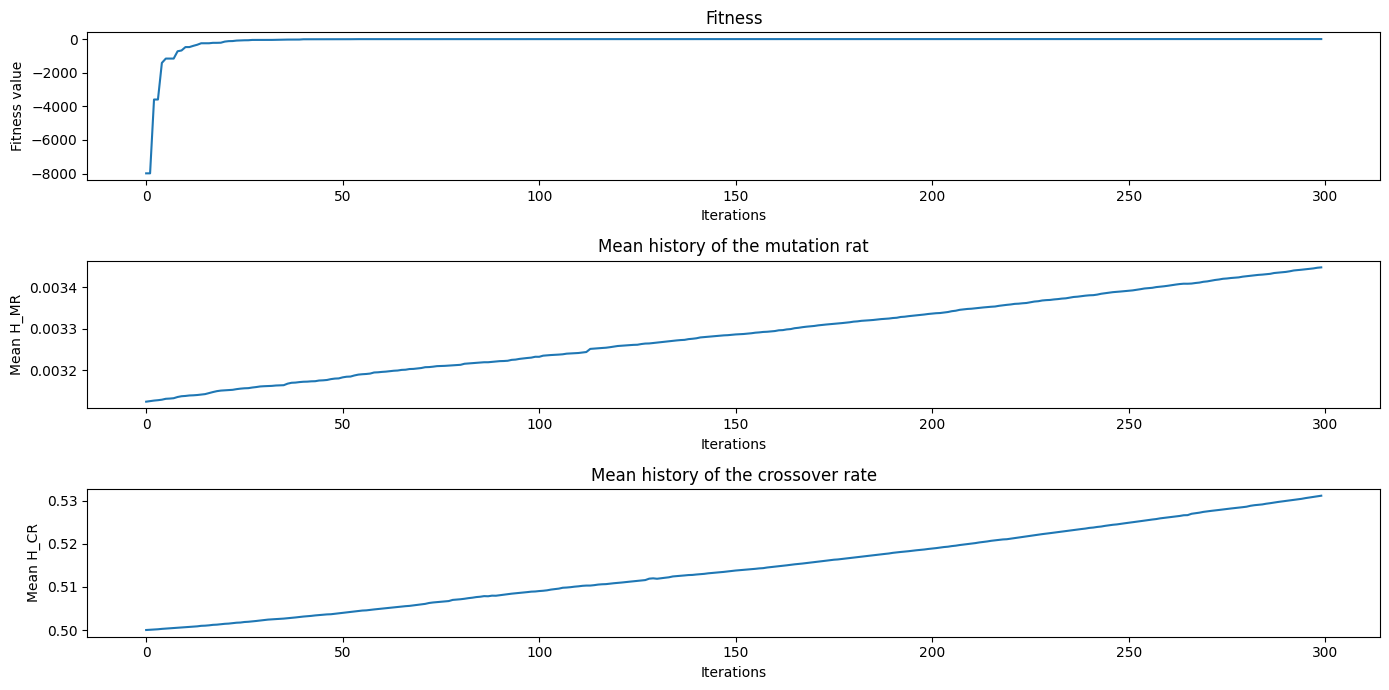

In [5]:
from thefittest.optimizers import SHAGA
from thefittest.benchmarks import Rosenbrock


optimizer = SHAGA(fitness_function=Rosenbrock(),
                  genotype_to_phenotype=genotype_to_phenotype.transform,
                  iters=number_of_iterations,
                  pop_size=population_size,
                  str_len=sum(parts),
                  show_progress_each=30,
                  minimization=True,
                  keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=3)

ax[0].plot(range(number_of_iterations), stats['max_fitness'])
ax[0].set_title('Fitness')
ax[0].set_ylabel('Fitness value')
ax[0].set_xlabel("Iterations")

ax[1].plot(range(number_of_iterations), np.array(stats['H_MR']).mean(axis = 1))
ax[1].set_title('Mean history of the mutation rat')
ax[1].set_ylabel('Mean H_MR')
ax[1].set_xlabel("Iterations")

ax[2].plot(range(number_of_iterations), np.array(stats['H_CR']).mean(axis = 1))
ax[2].set_title('Mean history of the crossover rate')
ax[2].set_ylabel('Mean H_CR')
ax[2].set_xlabel("Iterations")

plt.tight_layout()
plt.show()